<a href="https://colab.research.google.com/github/Gustavo-Macedo1/PIBITI-Tratamento-de-anomalias-com-IA/blob/main/PIBITI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Leitura dos dados

In [ ]:
# Instalação de dependências

!pip install pandas

In [ ]:
# Descobrindo nome do arquivo ZIP automaticamente após importação via API

from pathlib import Path

data_criacao = lambda f: f.stat().st_ctime
data_modificacao = lambda f: f.stat().st_mtime

diretorio = Path('.')
arquivos = diretorio.glob('*.zip')
sorted_arquivos = sorted(arquivos, key=data_modificacao, reverse=True)
nome_zip = sorted_arquivos[0].name

print(nome_zip)

Estacao_10100000_CSV_2024-09-29T23_09_44.585Z.zip


In [ ]:
# Extração do arquivo ZIP, seleção contendo o CSV de interesse

import os
from zipfile import ZipFile

zip = ZipFile(nome_zip, 'r')
nome_cotas = [arq for arq in zip.namelist() if arq.endswith('Cotas.csv')][0] # Seleciona arquivo que termina com "Cotas.csv" dentro do ZIP

zip.extract(nome_cotas) # Extrai o arquivo de cotas

'/content/10100000_Cotas.csv'

In [ ]:
# Importação e leitura dos dados

import pandas as pd

df = pd.read_csv(nome_cotas, encoding='ISO-8859-1', skiprows=15, delimiter=';')
estacao = df.iloc[0, 0]

print(f'Estação de análise: {estacao}\n')
df.head(10)

Estação de análise: 10100000



,EstacaoCodigo,NivelConsistencia,Data,hora,MediaDiaria,TipoMedicaoCotas,Maxima,Minima,Media,DiaMaxima,...,Cota22Status,Cota23Status,Cota24Status,Cota25Status,Cota26Status,Cota27Status,Cota28Status,Cota29Status,Cota30Status,Cota31Status
0,10100000,1,01/03/2024,07:00,0,1,1057.0,999.0,1032.0,28.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,10100000,1,01/03/2024,17:00,0,1,1057.0,999.0,1032.0,28.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,10100000,1,01/03/2024,NaN,1,1,1057.0,999.0,1032.0,28.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,10100000,1,01/02/2024,07:00,0,1,1042.0,935.0,985.0,28.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,10100000,1,01/02/2024,17:00,0,1,1042.0,935.0,985.0,28.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
5,10100000,1,01/02/2024,NaN,1,1,1042.0,935.0,985.0,28.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
6,10100000,1,01/01/2024,17:00,0,1,975.0,928.0,953.0,8.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,10100000,1,01/01/2024,07:00,0,1,975.0,928.0,953.0,8.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,10100000,1,01/01/2024,NaN,1,1,975.0,928.0,953.0,8.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,10100000,1,01/12/2023,07:00,0,1,941.0,372.0,748.0,31.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Pré-processamento dos dados

In [ ]:
# Filtro de colunas importantes

# Colunas de interesse (?):
# NivelConsistencia*
# Data
# MediaDiaria*
# Media
# Cota01 - Cota31

colunas = df.columns.to_list()
apagados = [colunas[0], colunas[3]] + (colunas[5:8] + colunas[9:16] + colunas[47:])
df.drop(columns=apagados, inplace=True)

df.head()

,NivelConsistencia,Data,MediaDiaria,Media,Cota01,Cota02,Cota03,Cota04,Cota05,Cota06,...,Cota22,Cota23,Cota24,Cota25,Cota26,Cota27,Cota28,Cota29,Cota30,Cota31
0,1,01/03/2024,0,1032.0,1040.0,1040.0,1036.0,1029.0,1021.0,1013.0,...,1041.0,1043.0,1050.0,1053.0,1054.0,1056.0,1057.0,1053.0,1053.0,1050.0
1,1,01/03/2024,0,1032.0,1040.0,1037.0,1033.0,1026.0,1019.0,1019.0,...,1042.0,1044.0,1052.0,1054.0,1055.0,1056.0,1057.0,1051.0,1052.0,1049.0
2,1,01/03/2024,1,1032.0,1040.0,1039.0,1035.0,1028.0,1020.0,1016.0,...,1042.0,1044.0,1051.0,1054.0,1055.0,1056.0,1057.0,1052.0,1053.0,1050.0
3,1,01/02/2024,0,985.0,959.0,957.0,953.0,951.0,949.0,940.0,...,1027.0,1031.0,1033.0,1035.0,1037.0,1039.0,1042.0,1038.0,NaN,NaN
4,1,01/02/2024,0,985.0,959.0,954.0,952.0,950.0,943.0,940.0,...,1029.0,1033.0,1034.0,1036.0,1038.0,1040.0,1042.0,1036.0,NaN,NaN


In [ ]:
# Filtro de linhas importantes

df = df[df['NivelConsistencia'] == 1]
df = df[df['MediaDiaria'] == 1]
df.drop(columns=['NivelConsistencia', 'MediaDiaria'], inplace=True)
df

,Data,Media,Cota01,Cota02,Cota03,Cota04,Cota05,Cota06,Cota07,Cota08,...,Cota22,Cota23,Cota24,Cota25,Cota26,Cota27,Cota28,Cota29,Cota30,Cota31
2,01/03/2024,1032.0,1040.0,1039.0,1035.0,1028.0,1020.0,1016.0,1005.0,1000.0,...,1042.0,1044.0,1051.0,1054.0,1055.0,1056.0,1057.0,1052.0,1053.0,1050.0
5,01/02/2024,985.0,959.0,956.0,953.0,951.0,946.0,940.0,942.0,942.0,...,1028.0,1032.0,1034.0,1036.0,1038.0,1040.0,1042.0,1037.0,NaN,NaN
8,01/01/2024,953.0,947.0,952.0,957.0,960.0,966.0,972.0,974.0,975.0,...,929.0,929.0,938.0,944.0,948.0,952.0,954.0,956.0,957.0,959.0
11,01/12/2023,748.0,376.0,403.0,448.0,506.0,558.0,603.0,644.0,679.0,...,829.0,838.0,854.0,870.0,881.0,893.0,908.0,925.0,934.0,940.0
14,01/11/2023,242.0,108.0,99.0,86.0,70.0,54.0,44.0,36.0,50.0,...,372.0,379.0,382.0,392.0,386.0,381.0,376.0,369.0,366.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,01/11/1982,860.0,670.0,691.0,711.0,737.0,757.0,767.0,774.0,782.0,...,946.0,958.0,968.0,977.0,983.0,988.0,990.0,991.0,993.0,NaN
1754,01/10/1982,589.0,491.0,510.0,525.0,535.0,543.0,549.0,561.0,562.0,...,633.0,636.0,636.0,641.0,650.0,654.0,654.0,652.0,650.0,656.0
1756,01/09/1982,455.0,532.0,526.0,518.0,513.0,509.0,502.0,494.0,484.0,...,372.0,365.0,366.0,383.0,403.0,424.0,444.0,459.0,477.0,NaN
1758,01/08/1982,640.0,677.0,676.0,676.0,678.0,678.0,680.0,685.0,691.0,...,613.0,603.0,596.0,590.0,585.0,580.0,572.0,566.0,557.0,554.0


# Visualização de dados

**Escolha de dados de interesse (?):**

| Eixo y | Eixo x |
|---|---|
|Cota individual|Dia|
|Cota média diária|Dia|

In [ ]:
# Plotagem da curva: Cota Média por Dia

import plotly.graph_objects as go

# Criação do objeto e definição dos eixos e da linha

fig = go.Figure()

x = df.Data[::-1]
y = df.Media[::-1]

fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines+markers',
                    name='Valor da cota média'))

annotations = []

# Titulo
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=f'Série Temporal de Cotas Médias - Estação: {estacao}',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,
                  yaxis_title="Cota Média",
                  xaxis_title="Data",
                  font=dict(
                  family="Arial",
                  size=12))
fig.show()

In [ ]:
# Plotagem teste da mesma curva, mas sem os pontos

import plotly.express as px
fig = px.line(df, x=x, y=y, title=f'Série Temporal de Cotas Médias - Estação: {estacao}', labels={'x': 'Data', 'y': 'Cota Média'})
fig.update_layout(showlegend=False)
fig.show()

# Identificação de intervalos faltantes

### Estratégia de identificação de intervalos faltantes

Na base de dados em questão, os registros faltantes são aqueles que possuem NaN na coluna de cota média. Dessa forma, uma função deve mostrar na tela os intervalos em que isso ocorre.

In [ ]:
# Mostrar as informações do dataframe

df.info(10)

<class 'pandas.core.frame.DataFrame'>
Index: 489 entries, 2 to 1760
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    489 non-null    object 
 1   Media   471 non-null    float64
 2   Cota01  483 non-null    float64
 3   Cota02  482 non-null    float64
 4   Cota03  482 non-null    float64
 5   Cota04  483 non-null    float64
 6   Cota05  482 non-null    float64
 7   Cota06  480 non-null    float64
 8   Cota07  480 non-null    float64
 9   Cota08  480 non-null    float64
 10  Cota09  480 non-null    float64
 11  Cota10  479 non-null    float64
 12  Cota11  479 non-null    float64
 13  Cota12  479 non-null    float64
 14  Cota13  479 non-null    float64
 15  Cota14  479 non-null    float64
 16  Cota15  479 non-null    float64
 17  Cota16  480 non-null    float64
 18  Cota17  480 non-null    float64
 19  Cota18  479 non-null    float64
 20  Cota19  479 non-null    float64
 21  Cota20  479 non-null    float64
 22  Cota21

In [ ]:
# Função que percorre a base buscando e isolando intervalos de dados faltantes

def encontra_intervalos(dataframe):
    intervalos = []
    subintervalo = []

    for linha in dataframe.iterrows():
        if pd.isna(linha[1]['Media']): # Encontrou uma linha com dado faltante
            subintervalo.append(linha[1]['Data']) # Adiciona data da linha no subintervalo
        else:
            if subintervalo != []: # Se encontrou uma linha normal, fecha o subintervalo e adiciona em 'intervalos'
                intervalos.append(subintervalo)
            subintervalo = []

    if subintervalo != []:
        intervalos.append(subintervalo) # Adicionando último subintervalo não vazio

    return intervalos

def mostrar_intervalos(intervalos):
    id = 1
    for intervalo in intervalos:
        print(f'Intervalo {id}: {intervalo}')
        id += 1

In [ ]:
# Mostrar intervalos de dados faltantes
intervalos = encontra_intervalos(df)
mostrar_intervalos(intervalos)

Intervalo 1: ['01/10/2018']
Intervalo 2: ['01/02/2017']
Intervalo 3: ['01/06/2016']
Intervalo 4: ['01/10/2015', '01/09/2015']
Intervalo 5: ['01/05/2014']
Intervalo 6: ['01/09/2013']
Intervalo 7: ['01/10/1993', '01/09/1993', '01/07/1993']
Intervalo 8: ['01/06/1992']
Intervalo 9: ['01/02/1992']
Intervalo 10: ['01/08/1991']
Intervalo 11: ['01/09/1990', '01/08/1990']
Intervalo 12: ['01/01/1990', '01/12/1989']
Intervalo 13: ['01/07/1982']


# Preenchimento de intervalos faltantes

## Interpolação em toda a distribuição

In [ ]:
# Para mostrar a interpolação, modificaremos uma cópia do dataframe original.

teste = df.copy()
teste.head()

,Data,Media,Cota01,Cota02,Cota03,Cota04,Cota05,Cota06,Cota07,Cota08,...,Cota22,Cota23,Cota24,Cota25,Cota26,Cota27,Cota28,Cota29,Cota30,Cota31
2,01/03/2024,1032.0,1040.0,1039.0,1035.0,1028.0,1020.0,1016.0,1005.0,1000.0,...,1042.0,1044.0,1051.0,1054.0,1055.0,1056.0,1057.0,1052.0,1053.0,1050.0
5,01/02/2024,985.0,959.0,956.0,953.0,951.0,946.0,940.0,942.0,942.0,...,1028.0,1032.0,1034.0,1036.0,1038.0,1040.0,1042.0,1037.0,NaN,NaN
8,01/01/2024,953.0,947.0,952.0,957.0,960.0,966.0,972.0,974.0,975.0,...,929.0,929.0,938.0,944.0,948.0,952.0,954.0,956.0,957.0,959.0
11,01/12/2023,748.0,376.0,403.0,448.0,506.0,558.0,603.0,644.0,679.0,...,829.0,838.0,854.0,870.0,881.0,893.0,908.0,925.0,934.0,940.0
14,01/11/2023,242.0,108.0,99.0,86.0,70.0,54.0,44.0,36.0,50.0,...,372.0,379.0,382.0,392.0,386.0,381.0,376.0,369.0,366.0,NaN


In [ ]:
# Interpolação linear e por spline de toda a distribuição utilizando Pandas DataFrames

interpolacao_linear = teste['Media'].interpolate(method='linear')
interpolacao_spline = teste['Media'].interpolate(method='spline', order=3)

In [ ]:
# Plot das curvas: normal, interpolação linear e interpolação por spline

import plotly.graph_objects as go

fig = go.Figure()

x = teste.Data[::-1]
y = teste.Media[::-1]

fig.add_trace(go.Scatter(x=x, y=interpolacao_spline[::-1] + 2000, name="spline", line_shape='spline'))
fig.add_trace(go.Scatter(x=x, y=interpolacao_linear[::-1] + 1000, name="linear"))
fig.add_trace(go.Scatter(x=x, y=y, name="normal"))

fig.show()

## Interpolação por intervalo de dados faltantes

In [ ]:
# Definição da função que interpola os intervalos faltantes de acordo com a escolha do usuário

def interpola_intervalos(df, intervalos):
    id = 1
    nova_interpolacao = df.copy()

    interpolacao_linear = nova_interpolacao['Media'].interpolate(method='linear')
    interpolacao_spline = nova_interpolacao['Media'].interpolate(method='spline', order=3)

    print('Nas perguntas abaixo, digite 1 para usar interpolação linear (IL) ou 2 para usar interpolação por spline (IS).')
    print('==============================================================================================================\n')

    for intervalo in intervalos:
        escolha = int(input((f'Como deseja consertar o intervalo {id}?\n')))
        if escolha == 1:
            for subintervalo in intervalo:
                indice = nova_interpolacao[nova_interpolacao['Data'] == subintervalo].index
                nova_interpolacao.loc[indice, 'Media'] = interpolacao_linear[indice]
        elif escolha == 2:
            for subintervalo in intervalo:
                indice = nova_interpolacao[nova_interpolacao['Data'] == subintervalo].index
                nova_interpolacao.loc[indice, 'Media'] = interpolacao_spline[indice]
        else:
            print('Escolha inválida. Por favor, digite 1 para IL ou 2 para IS.')
        id += 1

    print('\n===================================== Interpolação bem sucedida. =============================================')

    return nova_interpolacao

In [ ]:
# Exibir os intervalos com dados faltantes

mostrar_intervalos(intervalos)

Intervalo 1: ['01/10/2018']
Intervalo 2: ['01/02/2017']
Intervalo 3: ['01/06/2016']
Intervalo 4: ['01/10/2015', '01/09/2015']
Intervalo 5: ['01/05/2014']
Intervalo 6: ['01/09/2013']
Intervalo 7: ['01/10/1993', '01/09/1993', '01/07/1993']
Intervalo 8: ['01/06/1992']
Intervalo 9: ['01/02/1992']
Intervalo 10: ['01/08/1991']
Intervalo 11: ['01/09/1990', '01/08/1990']
Intervalo 12: ['01/01/1990', '01/12/1989']
Intervalo 13: ['01/07/1982']


In [ ]:
# Criacao da nova interpolação

nova_interpolacao = interpola_intervalos(df, intervalos)

Nas perguntas abaixo, digite 1 para usar interpolação linear (IL) ou 2 para usar interpolação por spline (IS).

Como deseja consertar o intervalo 1?
1
Como deseja consertar o intervalo 2?
1
Como deseja consertar o intervalo 3?
1
Como deseja consertar o intervalo 4?
2
Como deseja consertar o intervalo 5?
2
Como deseja consertar o intervalo 6?
2
Como deseja consertar o intervalo 7?
1
Como deseja consertar o intervalo 8?
1
Como deseja consertar o intervalo 9?
1
Como deseja consertar o intervalo 10?
2
Como deseja consertar o intervalo 11?
2
Como deseja consertar o intervalo 12?
2
Como deseja consertar o intervalo 13?
1

===================================== Interpolação bem sucedida. =============================================


In [ ]:
# Plot da nova curva interpolada

import plotly.graph_objects as go

fig = go.Figure()

x = nova_interpolacao.Data[::-1]
y = nova_interpolacao.Media[::-1]

fig.add_trace(go.Scatter(x=x, y=y, name="nova interpolação"))
fig.update_layout(title = f'Série Temporal Interpolada - Estação: {estacao}')

fig.show()

In [ ]:
# Plot das curvas: interpolada e original

import plotly.graph_objects as go

fig = go.Figure()

x = nova_interpolacao.Data[::-1]
y = nova_interpolacao.Media[::-1]

fig.add_trace(go.Scatter(x=x, y=y, name="nova interpolação"))
fig.add_trace(go.Scatter(x=x, y=df.Media[::-1], name="original"))

fig.show()

In [ ]:
# Confirmação da interpolação

decisao = input("Deseja confirmar os ajustes (s/n)? ")
if (decisao == 's') or (decisao == 'S'):
    df['Media'] = nova_interpolacao['Media']
else:
    print("Interpolação cancelada.")

Deseja confirmar os ajustes (s/n)? s


# Identificação de outliers

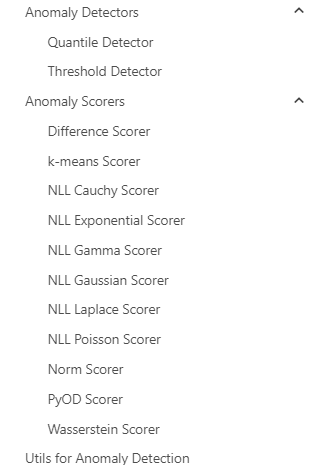

In [ ]:
!pip install darts

## K-means scorer: detecção não linear de anomalias

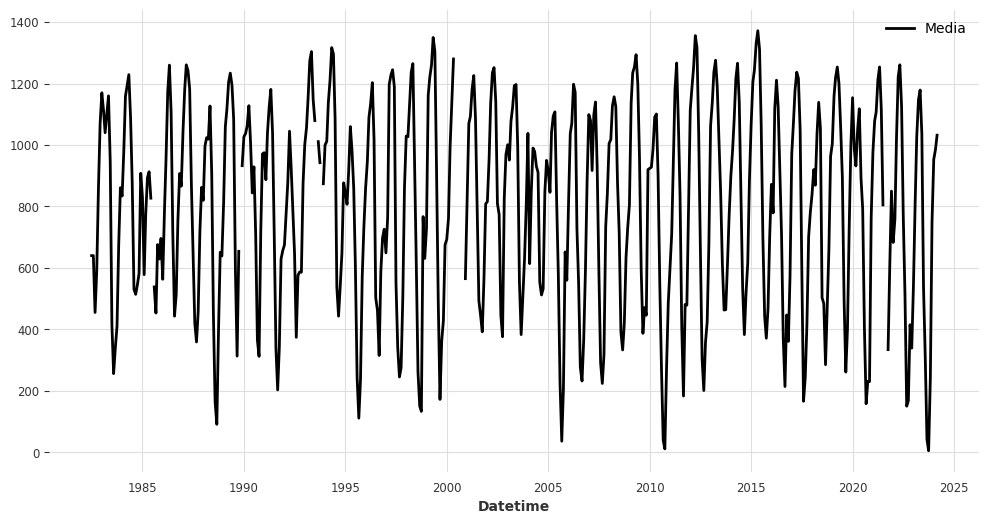

In [ ]:
# Importação do Darts e do MatPlotLib
from darts import TimeSeries
import matplotlib.pyplot as plt

# Criação do objeto TimeSeries utilizando 'Datetime' e 'Média'
df['Datetime'] = pd.to_datetime(df['Data'],format='%d/%m/%Y')
serie_temporal = TimeSeries.from_dataframe(df, 'Datetime', 'Media', freq='MS', fill_missing_dates=True,)

# Plot da TimeSeries
plt.figure(figsize=(12, 6))
serie_temporal.plot()
plt.show()

In [ ]:
# Revela os intervalos faltantes na série
serie_temporal.gaps()

,gap_start,gap_end,gap_size
0,1985-07-01,1985-07-01,1
1,1989-11-01,1989-11-01,1
2,1993-08-01,1993-08-01,1
3,1993-11-01,1993-11-01,1
4,2000-06-01,2000-11-01,6
5,2021-08-01,2021-09-01,2


In [ ]:
# Preenchimento de dados faltantes da série temporal via interpolação linear

serie_frame = serie_temporal.pd_series()
serie_frame.interpolate(method='linear', inplace=True)
serie_frame = serie_frame.to_frame()
serie_frame.reset_index(inplace=True)

serie_temporal = TimeSeries.from_dataframe(serie_frame, 'Datetime', 'Media', fill_missing_dates=True, freq='MS')

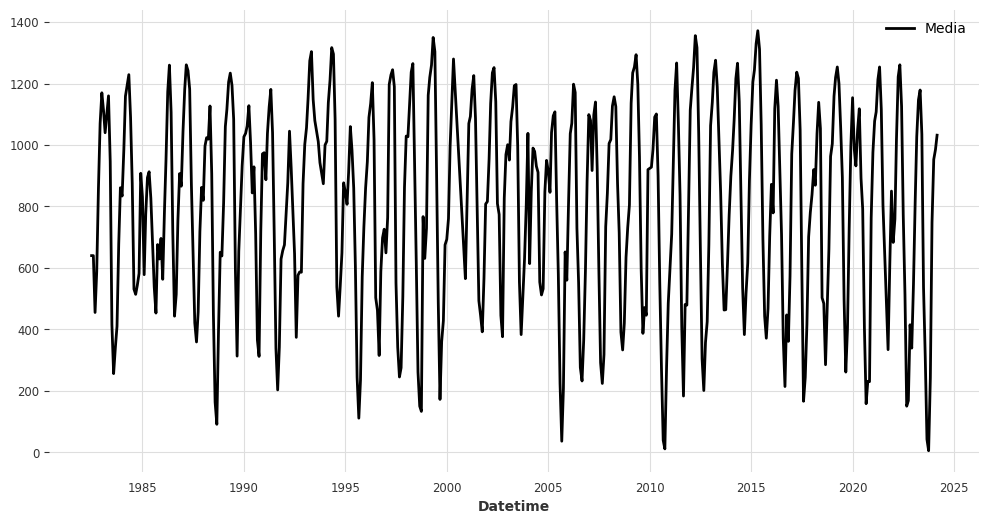

In [ ]:
# Plotando a série temporal reajustada

plt.figure(figsize=(12, 6))
serie_temporal.plot()
plt.show()

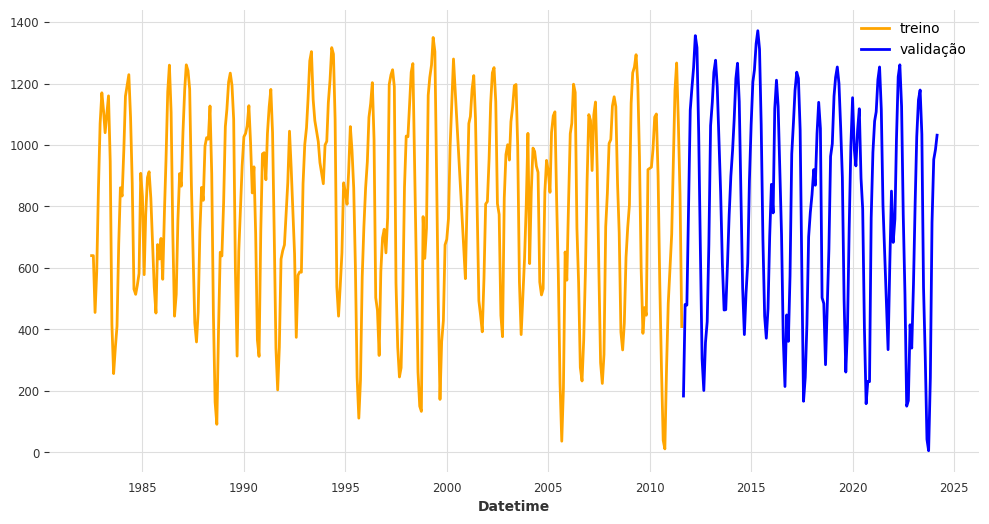

In [ ]:
train, val = serie_temporal.split_before(0.7)

plt.figure(figsize=(12, 6))
train.plot(label='treino', color='orange')
val.plot(label='validação', color='blue')

plt.show()

In [ ]:
from darts.ad import KMeansScorer
scorer = KMeansScorer(k=2, window=5)

In [ ]:
scorer.fit(train)

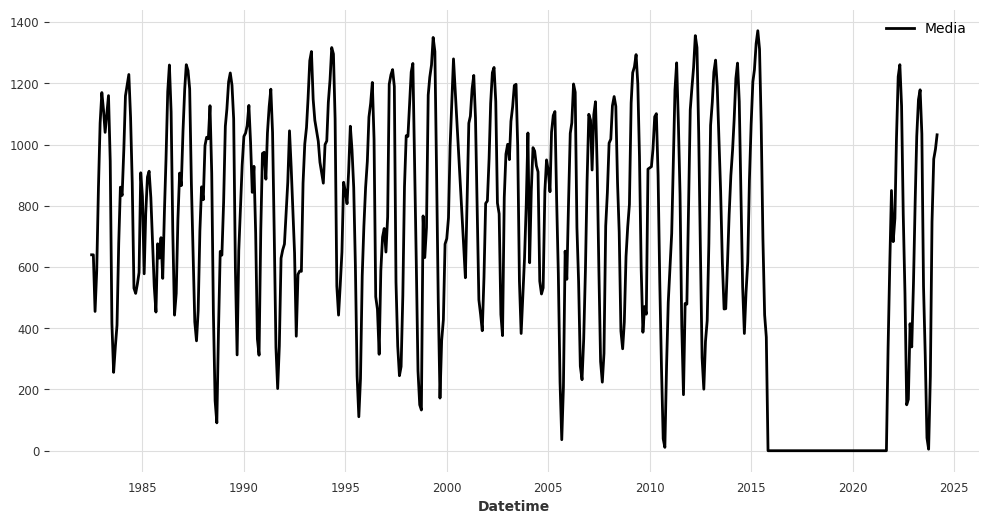

In [ ]:
# Gerando anomalias para teste do detector de outliers

teste = serie_frame

for data in teste.iterrows():
  if (data[0] >= 400) and (data[0] <= 470):
    teste.loc[data[0], 'Media'] = 0

ts_anomalias = TimeSeries.from_dataframe(teste, 'Datetime', 'Media', fill_missing_dates=True, freq='MS')

plt.figure(figsize=(12, 6))
ts_anomalias.plot()
plt.show()

In [ ]:
anom_score = scorer.score(ts_anomalias)

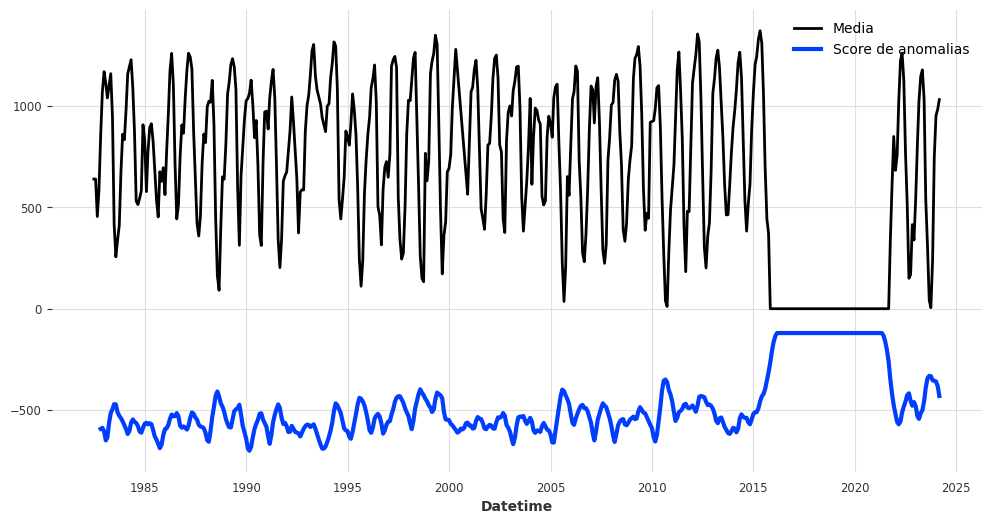

In [ ]:
plt.figure(figsize=(12, 6))

ts_anomalias.plot()
(anom_score/2 - 800).plot(label='Score de anomalias', lw=3)

plt.show()

## Quantile detector: detecção binária de anomalias

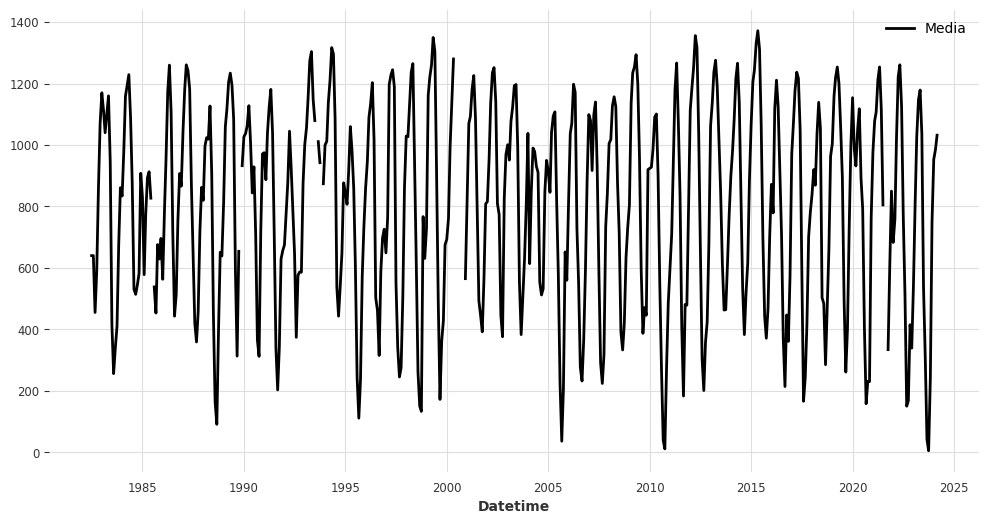

In [ ]:
# Redefinição das variáveis para estudo de detecção de outliers via Quantile Detector

df['Datetime'] = pd.to_datetime(df['Data'],format='%d/%m/%Y')
serie_temporal = TimeSeries.from_dataframe(df, 'Datetime', 'Media', fill_missing_dates=True, freq='MS')
plt.figure(figsize=(12, 6))

serie_temporal.plot()
plt.show()

In [ ]:
# Revela os intervalos faltantes na série
serie_temporal.gaps()

,gap_start,gap_end,gap_size
0,1985-07-01,1985-07-01,1
1,1989-11-01,1989-11-01,1
2,1993-08-01,1993-08-01,1
3,1993-11-01,1993-11-01,1
4,2000-06-01,2000-11-01,6
5,2021-08-01,2021-09-01,2


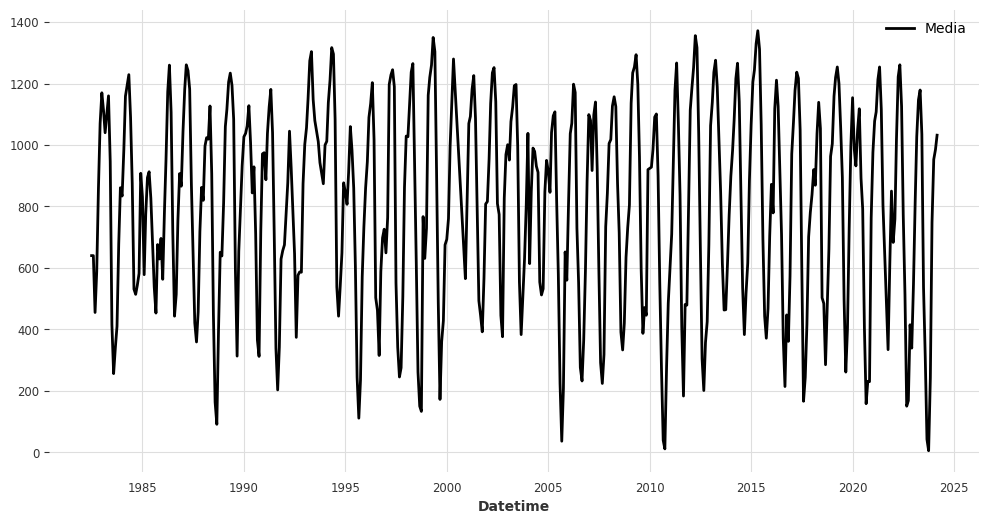

In [ ]:
# Preechimento da serie por interpolação linear

serie_temporal2 = serie_temporal.pd_series()
serie_temporal2.interpolate(method='linear', inplace=True)
serie_temporal2 = serie_temporal2.to_frame()
serie_temporal2.reset_index(inplace=True)
serie_temporal2 = TimeSeries.from_dataframe(serie_temporal2, 'Datetime', 'Media', fill_missing_dates=True, freq='MS')

# Plot da nova série temporal
plt.figure(figsize=(12, 6))
serie_temporal2.plot()
plt.show()

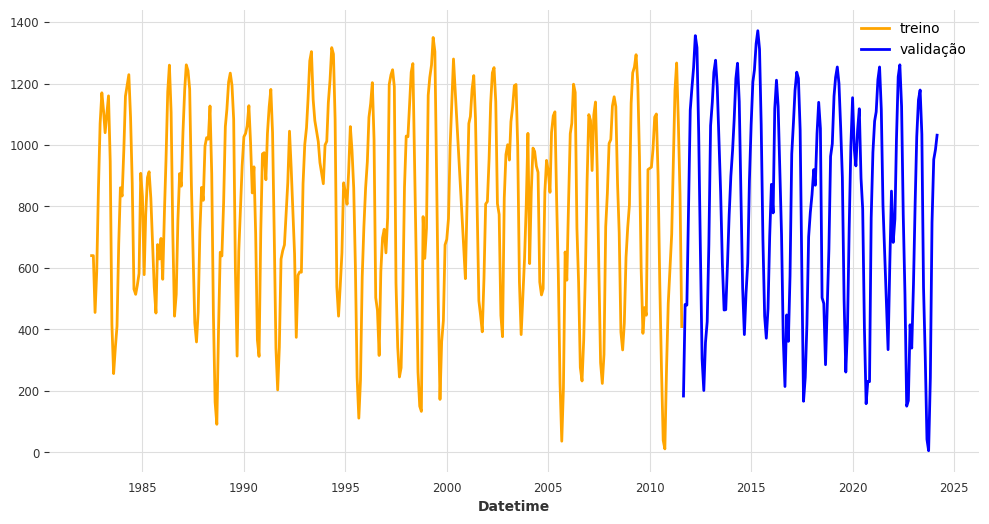

In [ ]:
# Separação em treino/validação
train, val = serie_temporal2.split_before(0.7)

# Plot das curvas de treino/validação
plt.figure(figsize=(12, 6))
train.plot(label='treino', color='orange')
val.plot(label='validação', color='blue')
plt.show()

In [ ]:
# Importação do Quantile Detector
from darts.ad import QuantileDetector

# Instanciação e treinamento nos dados de treino
detector = QuantileDetector(high_quantile=0.95)
detector.fit(scorer.score(train)) # O detector binário usa o scorer não linear para treinar

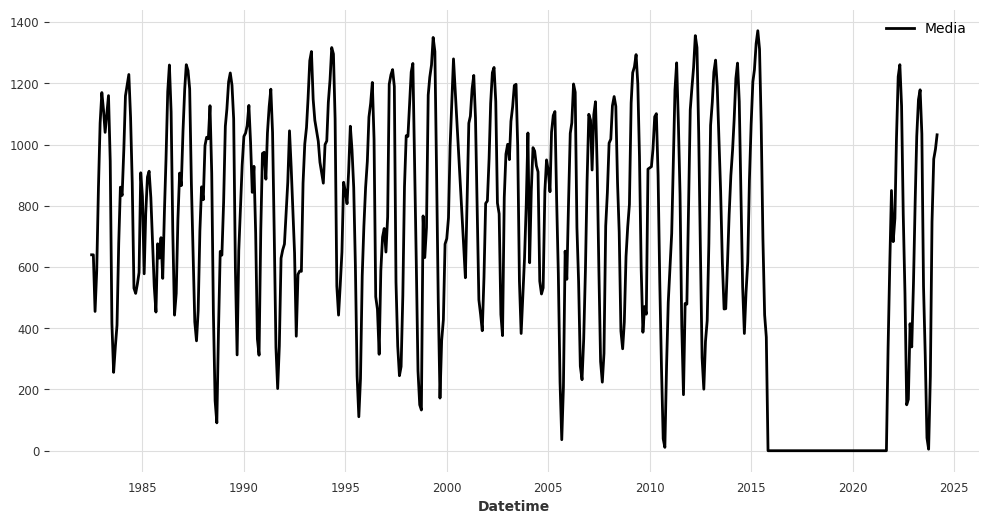

In [ ]:
# Gerando anomalias para teste do detector de outliers

teste = serie_frame


for data in teste.iterrows():
  if (data[0] >= 400) and (data[0] <= 470):
    teste.loc[data[0], 'Media'] = 0

ts_anomalias = TimeSeries.from_dataframe(teste, 'Datetime', 'Media', fill_missing_dates=True, freq='MS')

plt.figure(figsize=(12, 6))
ts_anomalias.plot()
plt.show()

In [ ]:
# Validação com o detector binário (Quantile) baseado na pontuação dada pelo detector não linear (K-means)

binary = detector.detect(anom_score)

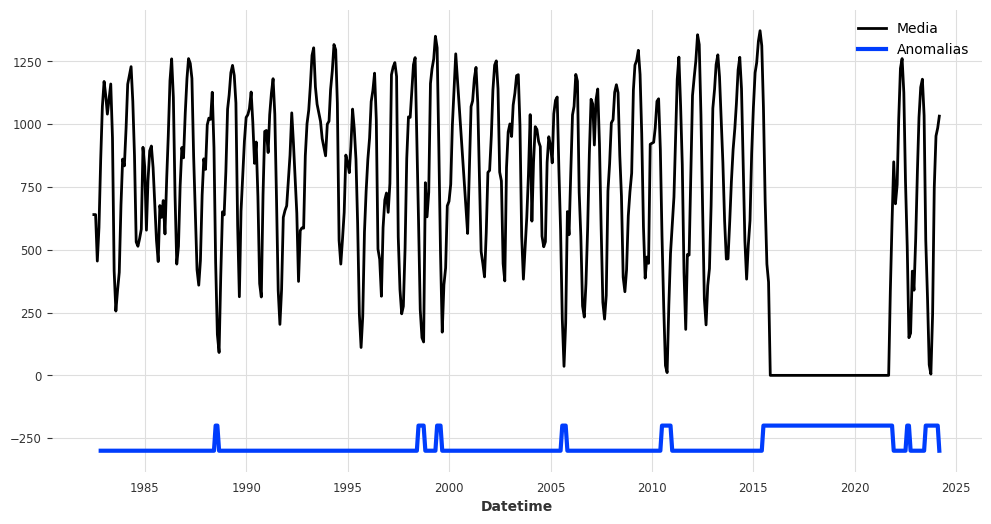

In [ ]:
# Plot das curvas: Média e Anomalia Binária

plt.figure(figsize=(12, 6))

ts_anomalias.plot()
(binary * 100 - 300).plot(label='Anomalias', lw=3)

plt.show()

# Extra

In [ ]:
# Obter datas mínima e máxima de observação

data_min = df['Data'].min()
data_max = df['Data'].max()

print(f'Período mínimo: {data_min}')
print(f'Período máximo: {data_max}')